# Decision Tree

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv("insurance.csv")

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [83]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

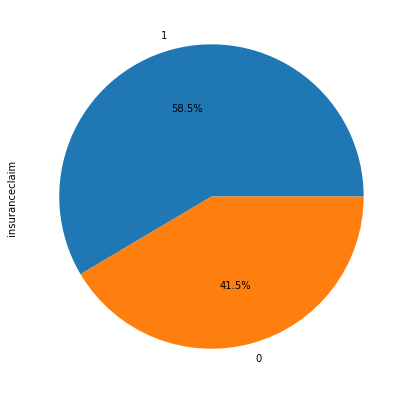

In [84]:
plt.figure(figsize=(7,7))
df["insuranceclaim"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

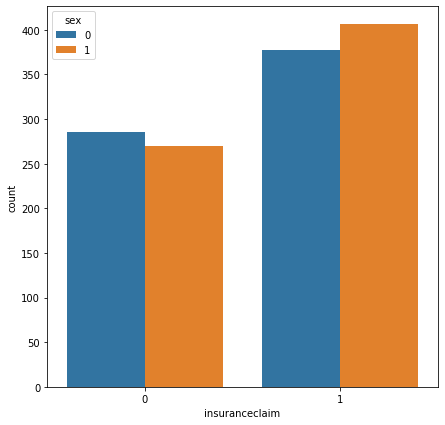

In [85]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="sex")
plt.show()

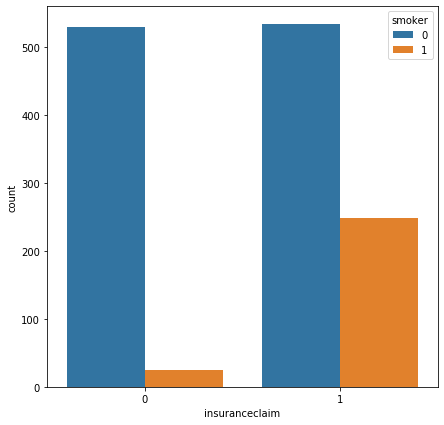

In [86]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()

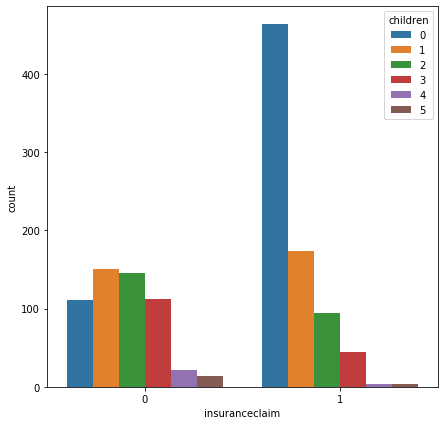

In [87]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()

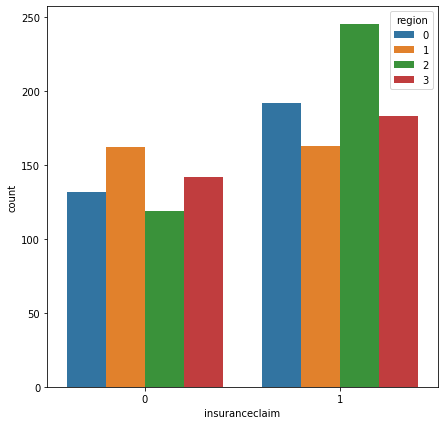

In [88]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()

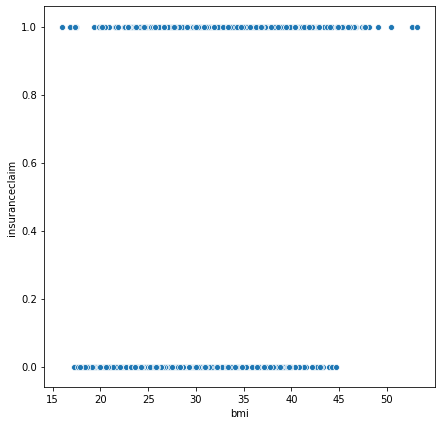

In [89]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="bmi",y="insuranceclaim")
plt.show()

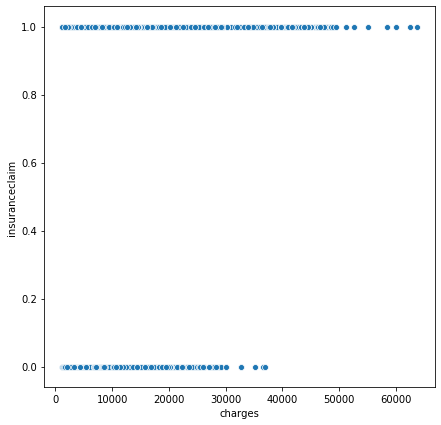

In [90]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()

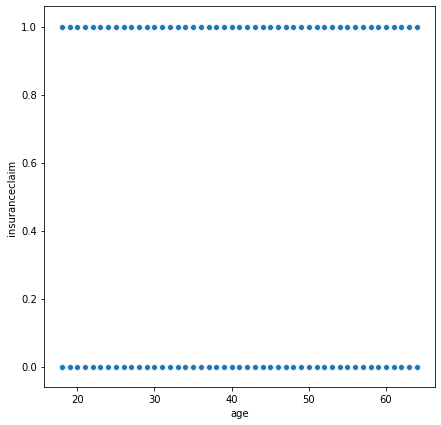

In [91]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="age",y="insuranceclaim")
plt.show()

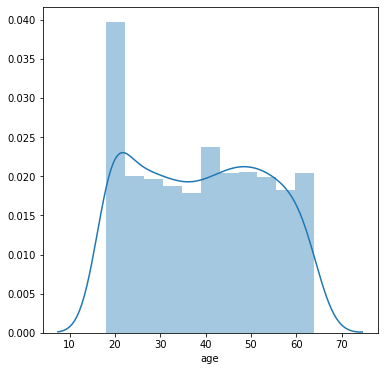

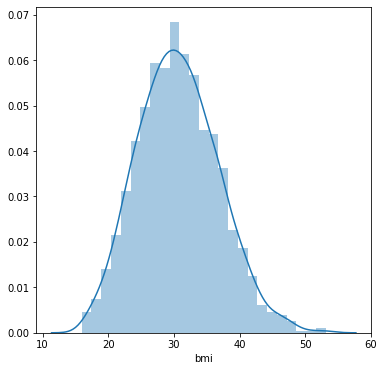

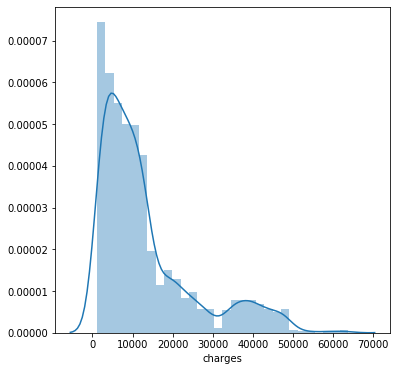

In [92]:
cols = ["age","bmi","charges"]

for col in cols:
    plt.figure(figsize=(6,6))
    sns.distplot(df[col])
    plt.show()

    

In [93]:
def create_model(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [94]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [95]:
lr = LogisticRegression()

In [96]:
lr = create_model(lr,X,y)

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.80      0.80       402



In [97]:
dt = DecisionTreeClassifier()

In [98]:
dt = create_model(dt,X,y)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [99]:
dt.feature_importances_

array([0.0633924 , 0.        , 0.4259328 , 0.32951284, 0.16581384,
       0.        , 0.01534812])

#### Decision Tree with max_depth

In [100]:
dt2 = DecisionTreeClassifier(max_depth=5)

In [101]:
dt2 = create_model(dt2,X,y)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       157
           1       0.96      0.89      0.92       245

    accuracy                           0.91       402
   macro avg       0.90      0.92      0.91       402
weighted avg       0.91      0.91      0.91       402



In [102]:
dt2.feature_importances_

array([0.06088956, 0.        , 0.36385072, 0.36645051, 0.19857208,
       0.        , 0.01023713])

#### Decision Tree with min_sample_leaf

In [103]:
dt3 = DecisionTreeClassifier(min_samples_leaf=90)

In [104]:
dt3 = create_model(dt3,X,y)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       157
           1       0.84      0.86      0.85       245

    accuracy                           0.82       402
   macro avg       0.81      0.80      0.81       402
weighted avg       0.81      0.82      0.82       402



In [105]:
dt3.feature_importances_

array([0.        , 0.        , 0.34502725, 0.4225545 , 0.        ,
       0.        , 0.23241826])